***Vorlesung 'Syntax natürlicher Sprachen', WS 2020/21***

---
# Übung 5

In [1]:
from exercises_5 import *
from questions import aufgabe
import nltk
from nltk import Tree
import sys

---
## Aufgabe 1: Manuelle Dependenzanalyse

#### Stellen Sie folgenden Satz im Dependenzmodell dar:
- Die neue Kollegin fährt mit der S-Bahn zu ihrem neuen Arbeitsplatz.

#### (a) Erstellen Sie dafür zunächst einen Konstituentenbaum mit Angabe der perkolierten (hochgereichten) Köpfe
(`head(S) = head(VP)`)

(Regeln für Baum:
`S=NP+VP`, `NP=DET+(ADJ)+N`, `PP=P+NP`, `VP=V+(PP)*`)

In [2]:
np1 = Tree(
    'NP (Kollegin)',
    [Tree('DET', ['Die']), Tree('ADJ', ['neue']), Tree('N', ['Kollegin'])]
)
vp = Tree(
    'VP (fährt)',
    [
        Tree('V', ['fährt']),
        Tree('PP (mit)', [
            Tree('P', ['mit']),
            Tree('NP (S-Bahn)', [
                Tree('DET', ['der']),
                Tree('N', ['S-Bahn'])
            ])
        ]),
        Tree('PP (zu)', [
            Tree('P', ['zu']),
            Tree('NP (Arbeitsplatz)', [
                Tree('DET', ['ihrem']),
                Tree('ADJ', ['neuen']),
                Tree('N', ['Arb.'])
            ])
        ])
    ]
)
s = Tree(
    'S (fährt)',
    [np1, vp]
)

s.pretty_print(unicodelines=True)

                                     S (fährt)                                                                
          ┌──────────────────────────────┴─────────────────────┐                                               
          │                                                VP (fährt)                                         
          │                  ┌───────────┬─────────────────────┴───────────────────┐                           
          │                  │        PP (mit)                                  PP (zu)                       
          │                  │    ┌──────┴──────────┐                  ┌───────────┴────────────┐              
    NP (Kollegin)            │    │            NP (S-Bahn)             │                NP (Arbeitsplatz)     
 ┌────────┼──────────┐       │    │      ┌──────────┴──────────┐       │    ┌───────────────────┼──────────┐   
DET      ADJ         N       V    P     DET                    N       P   DET                 ADJ         N

#### (b) Fertigen Sie nun eine Tabelle an, in der Sie zu jedem Kopfwort seine Dependenten notieren. Für jede Gruppe unmittelbarer Konstituenten einer Phrase (Ko-Konstituenten) gilt dabei, dass die nicht-hochgereichten Köpfe die Dependenten des hochgereichten Kopfes sind (Nicht-Köpfe in der Phrase sind abhängig vom Kopf der Phrase).

#### Beantworten Sie anschließend folgende Fragen:

In [3]:
aufgabe(blatt5_3b)

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Markieren Sie alle direkten Dependenten des W…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Markieren Sie alle direkten Dependenten des W…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Markieren Sie alle direkten Dependenten des W…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Markieren Sie alle direkten Dependenten des W…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Markieren Sie alle direkten Dependenten des W…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Markieren Sie alle direkten Dependenten des W…

#### (c) Konvertieren Sie Ihre Tabelle nun in einen Dependenzbaum (Stemma).

In [4]:
dep_tree = Tree(
    "fährt",
    [
        Tree("Kollegin", ["die", "neue"]),
        Tree("mit", [Tree("S-Bahn", ["der"])]),
        Tree("zu", [Tree("Arbeitsplatz", ["ihrem", "neuen"])])
    ]
)

dep_tree.pretty_print()

                  fährt                          
        ____________|_______________              
       |           mit              zu           
       |            |               |             
    Kollegin      S-Bahn       Arbeitsplatz      
  _____|______      |       ________|_________    
die          neue  der   ihrem              neuen



#### (d) Versehen Sie den Dependenzbaum mit den Labeln des Universal-Dependency-Tagsets: http://universaldependencies.org/u/dep/ (+ `prep` für Präposition als direkter Dependent zum Verb und `pcomp` als dessen Dependent)

#### Kontrollieren Sie sich dann selbst mit den folgenden Fragen:

In [5]:
aufgabe(blatt5_3d)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht zwischen <i> K…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht zwischen <i> K…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht zwischen <i> K…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht zwischen <i> f…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht zwischen <i> f…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht zwischen <i> f…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht zwischen <i> m…

#### (e) Fertigen Sie einen weiteren Dependenzgraphen für die alternative Analyse der Präposition als Kasus-Marker (`case`) an.

In [6]:
dep_tree_alt = Tree(
     "fährt",
    [
        Tree("Kollegin", ["die", "neue"]),
        Tree("S-Bahn", ["mit", "der"]),
        Tree("Arbeitsplatz", ["zu", "ihrem", "neuen"])
    ]
)

dep_tree_alt.pretty_print()

                             fährt                       
        _______________________|____________              
    Kollegin          S-Bahn           Arbeitsplatz      
  _____|______      ____|______      _______|_________    
die          neue mit         der   zu    ihrem     neuen



#### Beantworten Sie anschließend folgende Fragen zur Kantenbeschriftung:

In [7]:
aufgabe(blatt5_3e)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht jetzt zwischen…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht jetzt zwischen…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht jetzt zwischen…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht jetzt zwischen…

#### (f) Welche Konstituenten lassen sich anhand der Struktur des Dependenzbaumes identifizieren?

In [8]:
aufgabe(blatt5_3f)

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Konstituenten lassen sich am Dependenz…

---
## Aufgabe 2: Ergänzungen vs. Angaben (I)

#### Betrachten Sie den folgenden Satz:
- Die neue Kollegin fährt mit der S-Bahn zu ihrem neuen Arbeitsplatz.

#### Diskutieren Sie, ob in diesem Satz alle vom Verb abhängigen Satzglieder Ergänzungen sind. Welche Tests können Sie anführen, um Ihren Standpunkt zu begründen?

#### Beantworten Sie zusätzlich die folgenden Fragen:

In [9]:
aufgabe(blatt5_2)

Lueckentext(children=(HTML(value='<i>Vervollständigen Sie den Lückentext: </i>', layout=Layout(justify_content…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Mit welchen Tests kann die Funktion des obrig…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Bei welchen Sätzen wurden die Tests richtig a…

---
## Aufgabe 3: Phrasenkategorien

#### Erläutern Sie an folgendem Beispielsatz den Unterschied zwischen Adverb und Adverbial.
- Paul schwimmt sehr gut.

#### Beantworten Sie zusätzlich folgende Fragen:

In [10]:
aufgabe(blatt5_5)

Lueckentext(children=(HTML(value='<i>Vervollständigen Sie den Lückentext: </i>', layout=Layout(justify_content…

---
## Aufgabe 4: Subjektidentifikation

#### Inwiefern bereitet die NP *ein Fehler* im folgenden Satz Schwierigkeiten für die Anwendung der gängigen Identifikationskriterien von Subjekten?
- Dem Lehrer ist schon wieder ein Fehler unterlaufen.

#### Beantworten Sie außerdem die folgenden Fragen.

In [11]:
aufgabe(blatt5_6)

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Was sind Identifikationskriterien für das Sub…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Was gilt <b>nicht</b> für die NP <i> ein Fehl…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Was spricht dafür, dass es sich bei <i> ein F…

---
## Aufgabe 5: Direkte und indirekte Objekte

---
### Aufgabe 5 a:
#### Handelt es sich bei der Genitiv-NP in folgendem Satz um ein direktes Objekt?
#### Bitte begründen!
- Ich freue mich darüber, dass man ihn endlich des Diebstahls überführt hat.

#### Beantworten Sie im Zuge dessen auch die folgenden Fragen.

In [12]:
aufgabe(blatt5_7a)

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Gründe sprechen für eine Klassifizieru…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche im Deutschen für das Objekt typische K…

---
### Aufgabe 5b:

#### Vergleichen Sie den deutschen Satz (1.) mit dem englischen Äquivalent. Wie wird das indirekte Objekt im Englischen, wie wird es im Deutschen kodiert?
1. Ich gebe dem Jungen das Buch.
2. I give the book to the boy.

#### Beantworten Sie die folgenden zwei Fragen.

In [13]:
aufgabe(blatt5_7b)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Im Englischen wird das indirekte Objekt _______…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Im Deutschen wird das indirekte Objekt ________…

---
## Aufgabe 6: Attributtypen

#### Analysieren Sie die folgende komplexe NP. Welche Attributtypen treten auf?
- Die lang ersehnte Fahrt der Klasse 5b nach Paris, die sich aus irgendeinem Grunde immer wieder verzögert hatte, findet nun endlich statt.

In [14]:
aufgabe(blatt5_4)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Um welchen Attributtyp handelt es sich bei dem …

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Um welchen Attributtyp handelt es sich bei dem …

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Um welchen Attributtyp handelt es sich bei dem …

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Um welchen Attributtyp handelt es sich bei dem …

---
# Hausaufgaben 

---
## Aufgabe 7: Manuelle Dependenzanalyse

#### Stellen Sie folgenden Satz im Dependenzmodell dar:
- Ich kenne einen älteren Bruder von zwei sehr lebhaften Mädchen.

#### (a) Erstellen Sie dafür zunächst einen Konstituentenbaum mit Angabe der perkolierten (hochgereichten) Köpfe
(`head(S) = head(VP)`)

(Regeln für Baum:
`S=NP+VP`, `NP=DET+(ADJP)+N+(PP)` oder `NP=PRON` oder `NP=NUM+(ADJP)+N`, `PP=P+NP`, `ADJP=(ADV)+ADJ`, `VP=V+NP`)

Bestimmen Sie die Köpfe dieses Mal sofort gemäß der Primacy of Content Words (http://universaldependencies.org/u/overview/syntax.html); vgl. Aufgabe 3 (e)

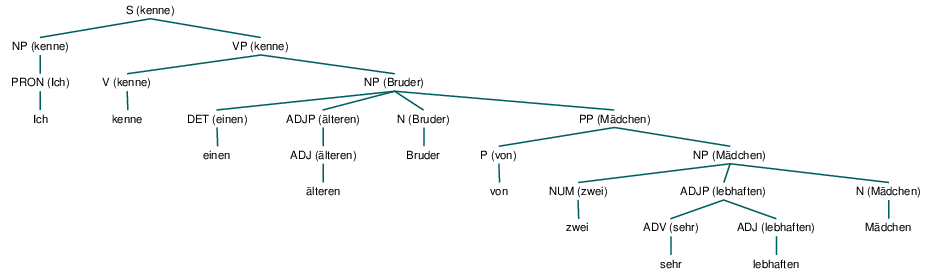

In [15]:
from IPython.display import display

np1 = Tree(
    'NP (kenne)',
    [Tree('PRON (Ich)', ['Ich'])]
)
adjp2 = Tree (
 'ADJP (lebhaften)',
    [Tree('ADV (sehr)', ['sehr']), Tree('ADJ (lebhaften)', ['lebhaften'])]
)
np3 = Tree(
'NP (Mädchen)',
    [Tree('NUM (zwei)', ['zwei'] ), adjp2, Tree('N (Mädchen)',['Mädchen'] )]
)
pp = Tree(
    'PP (Mädchen)',
    [Tree ('P (von)', ['von']), np3]
)
adjp1 = Tree(
    'ADJP (älteren)',
    [Tree('ADJ (älteren)', ['älteren'])]
)
np2 = Tree(
    'NP (Bruder)',
    [ Tree ('DET (einen)', ['einen']), adjp1, Tree ('N (Bruder)', ['Bruder']), pp]
)
vp = Tree(
    'VP (kenne)',
    [Tree('V (kenne)', ['kenne']), np2]
)
s = Tree(
    'S (kenne)',
    [np1, vp]
)

display(s)

#### (b) Fertigen Sie nun eine Tabelle an, in der Sie zu jedem Kopfwort seine Dependenten notieren. Für jede Gruppe unmittelbarer Konstituenten einer Phrase (Ko-Konstituenten) gilt dabei, dass die nicht-hochgereichten Köpfe die Dependenten des hochgereichten Kopfes sind (Nicht-Köpfe in der Phrase sind abhängig vom Kopf der Phrase).

#### Beantworten Sie anschließend folgende Fragen:

In [16]:
aufgabe(blatt5_9b)

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Markieren Sie alle direkten Dependenten des W…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Markieren Sie alle direkten Dependenten des W…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Markieren Sie alle direkten Dependenten des W…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Markieren Sie alle direkten Dependenten des W…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Markieren Sie alle direkten Dependenten des W…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Markieren Sie alle direkten Dependenten des W…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Markieren Sie alle direkten Dependenten des W…

#### (c) Konvertieren Sie Ihre Tabelle nun in einen Dependenzbaum (Stemma).

In [17]:
dep_tree = Tree(
    "kenne",
    ["Ich", Tree("Bruder", 
                 ["einen", "älteren", Tree("Mädchen", 
                                          ["von", "zwei", Tree("lebhaften",
                                                              ["sehr"])
                                          ]) 
                 ])
    ]
)

dep_tree.pretty_print()

           kenne                          
  ___________|______                       
 |                Bruder                  
 |     _____________|_______               
 |    |      |           Mädchen          
 |    |      |       _______|________      
 |    |      |      |       |    lebhaften
 |    |      |      |       |        |     
Ich einen älteren  von     zwei     sehr  



#### (d) Versehen Sie den Dependenzbaum mit den Labeln des Universal-Dependency-Tagsets: http://universaldependencies.org/u/dep/

#### Kontrollieren Sie sich dann selbst mit den folgenden Fragen:

In [18]:
aufgabe(blatt5_9d)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht zwischen <i> B…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht zwischen <i> B…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht zwischen <i> B…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht zwischen <i> k…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht zwischen <i> B…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht zwischen <i> l…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Art von Dependenz besteht zwischen <i> z…

---
## Aufgabe 8: Ergänzungen vs. Angaben (II)

#### Diskutieren Sie die Problematik der Unterscheidung von Ergänzungen und Angaben mit Bezug auf die folgenden Sätze:
1. *Peter steigt auf das Pferd.*
2. *Peter besteigt das Pferd.*
3. *Peter reitet das Pferd.*

#### Bearbeiten Sie auch die nachfolgenden Aufgaben.

#### Welche Ergebnisse liefern die Tests zur Komplement/Adjunkt-Differenzierung?

In [19]:
aufgabe(blatt5_8a)

Lueckentext(children=(HTML(value='<i>Vervollständigen Sie den Lückentext: </i>', layout=Layout(justify_content…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Schlägt der Adverbialsatz-Test fehl, so handelt…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Schlägt der geschehen-Test fehl, so handelt es …

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Tests ergeben, dass es sich bei <i> au…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Tests ergeben, dass es sich bei <i> da…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Tests ergeben, dass es sich bei <i> da…

#### Beantworten Sie auch die folgenden Fragen:

In [20]:
aufgabe(blatt5_8b)

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Unter der Annahmen, dass alle präpositional a…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Unter der Annahmen, dass alle Adverbiale Anga…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Wie könnte man abschließend das in Frage stehen…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Wie könnte man abschließend das in Frage stehen…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Wie könnte man abschließend das in Frage stehen…

---
## Aufgabe 9: Phrasenkategorien

#### Bestimmen Sie in folgendem Satz, ob es sich bei der Präpositionalphrase um ein präpositionales Objekt oder um ein Adverbial handelt. Begründen Sie Ihre Entscheidung.
- Peter verlässt sich immer gerne auf andere.

In [21]:
aufgabe(blatt5_10)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Handelt es sich im Satz bei der Präpositionalph…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Wieso?</h4>'), HTML(value='<i>Markieren Sie <…

--- 
## Aufgabe 10: Valenz und Dependenz

#### Zeigen Sie an folgendem Satz den Unterschied zwischen Valenz und Dependenz auf:
- Peter schläft gerne im Zelt.

In [22]:
aufgabe(blatt5_11)

Lueckentext(children=(HTML(value='<i>Vervollständigen Sie den Lückentext: </i>', layout=Layout(justify_content…

Lueckentext(children=(HTML(value='<i>Vervollständigen Sie den Lückentext: </i>', layout=Layout(justify_content…

--- 
## *Aufgabe 11 - Praktische Aufgabe: Dependenzparsing

#### Parsen Sie den Satz *Joe put the fish on the log* über die Webanwendung des Stanford-Parsers: http://nlp.stanford.edu:8080/parser/index.jsp. Machen Sie sich mit der Darstellung der Dependenzrelationen (Ergebnis unter ’Universal Dependencies’) vertraut und vergleichen Sie die Darstellung mit der Visualisierung, die Sie sich auf http://nlp.stanford.edu:8080/corenlp/process anzeigen lassen können (unter ’Basic Dependencies’).

---
## Aufgabe 12: Fragen zu NLTK-Kapitel 8.5

#### Lesen Sie das NLTK-Teilkapitel 8.5 (’Dependencies and Dependency Grammar’): http://www.nltk.org/book/ch08.html.

#### Beantworten Sie insbesondere folgende Fragen:

---
### Aufgabe 12 a:

#### Welche Kriterien für die Entscheidung, was in einer Konstruktion (C) Head (H) und was Dependent (D) ist, werden genannt?

In [23]:
aufgabe(blatt5_13a)

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Kriterien stimmen?</h4>'), HTML(value=…

---
### Aufgabe 12 b:

#### Welche Lösung wird in 8.5.1 (’Valency and the Lexicon’) für die Behandlung von Verben mit unterschiedlicher Valenz in einer CFG vorgeschlagen?

In [24]:
aufgabe(blatt5_13b)

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Wie läßt sich die Einführung von einem Nicht…